In [1]:
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import os
env = gym.make('MountainCar-v0')

In [2]:
testDyna = DynaAgent(env, discr_step=[0.1, 0.01], should_log=False)

In [3]:
total_reward = testDyna.train(num_episodes=30)

states


100%|██████████| 30/30 [00:01<00:00, 29.90it/s]

[Save Model] : Model was saved succesfully in discr_step=[0.1, 0.01]@discount_factor=0.99@20240602-173201 !


In [4]:
testDyna.states

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

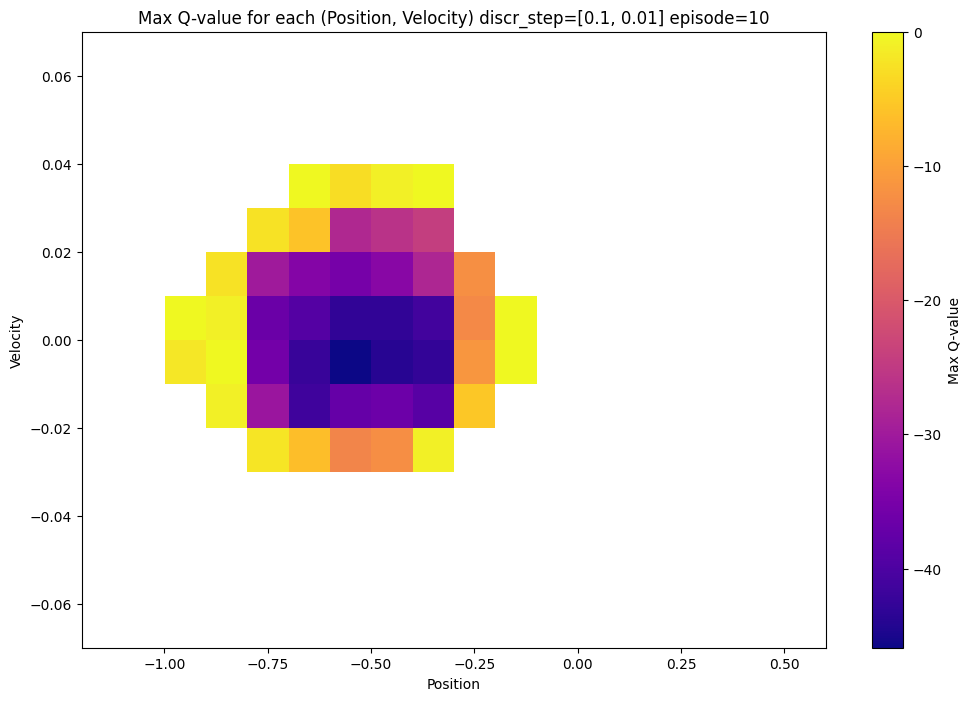

In [14]:
if True:
        position_bins = np.arange(-1.2, 0.6, testDyna.discr_step[0])
        velocity_bins = np.arange(-0.07, 0.0699, testDyna.discr_step[1])
        
        num_pos_bins = len(position_bins)
        num_vel_bins = len(velocity_bins)

        max_Q_values = np.max(testDyna.Q, axis=1).reshape(num_pos_bins, num_vel_bins)
        unvisited_mask = np.all(testDyna.Q == 0, axis=1).reshape(num_pos_bins, num_vel_bins)
        masked_max_Q_values = np.ma.masked_where(unvisited_mask, max_Q_values)

        # Plot the max Q-values as a heatmap
        plt.figure(figsize=(12, 8))
        heatmap = plt.imshow(masked_max_Q_values.T, cmap='plasma', origin='lower', aspect='auto',
                        extent=[position_bins[0], position_bins[-1] + testDyna.discr_step[0], velocity_bins[0], velocity_bins[-1] + testDyna.discr_step[1]])
        plt.colorbar(heatmap, label='Max Q-value')
        plt.xlabel('Position')
        plt.ylabel('Velocity')
        plt.title(f'Max Q-value for each (Position, Velocity) discr_step={testDyna.discr_step} episode={10}')

        # Extract the position and velocity values from the states
        positions = []
        velocities = []
        for i in range(num_pos_bins):
            for j in range(num_vel_bins):
                if testDyna.states[i][j] == 1:
                    positions.append(position_bins[i])
                    velocities.append(velocity_bins[j])

        # Plot the trajectory
        plt.plot(positions, velocities, 'r-', label=f'Traj. Ep.: {10}')
        plt.legend()
        plt.show()

In [4]:
print(np.sum(np.array(testDyna.total_reward)))
print(np.average(np.array(testDyna.total_reward)))

-443239.0
-147.74633333333333


In [5]:
import datetime
np.save(f"../../@dyna@{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}", np.array(testDyna.total_reward))

In [6]:
testDyna.freq_actions

[167283, 77543, 223150]

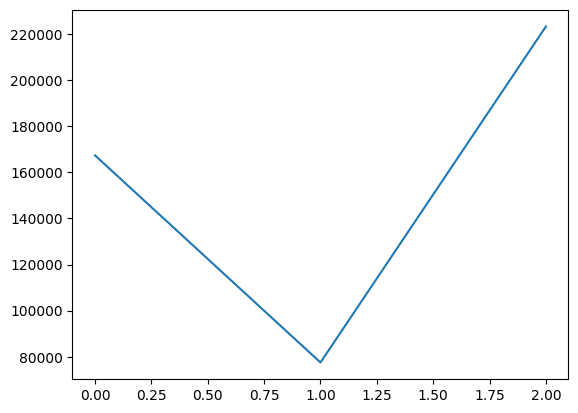

In [7]:
plt.plot(testDyna.freq_actions)

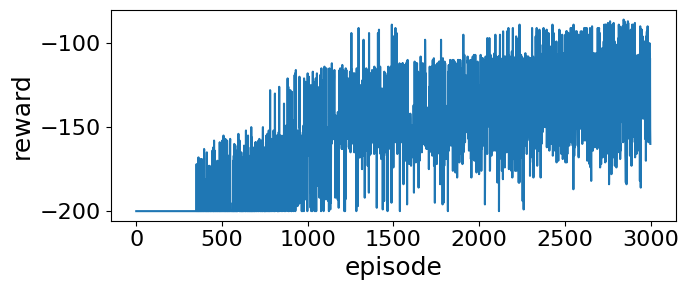

In [8]:
plt.figure(figsize=(7, 3))
plt.plot(total_reward)
#plt.title('Reward at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()

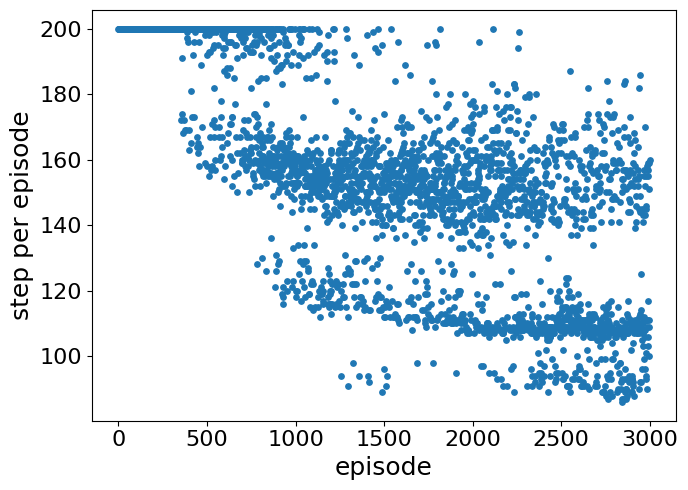

In [9]:
plt.figure(figsize=(7, 5))
plt.scatter(np.arange(3000),np.abs(total_reward), s=15)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('step per episode', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()

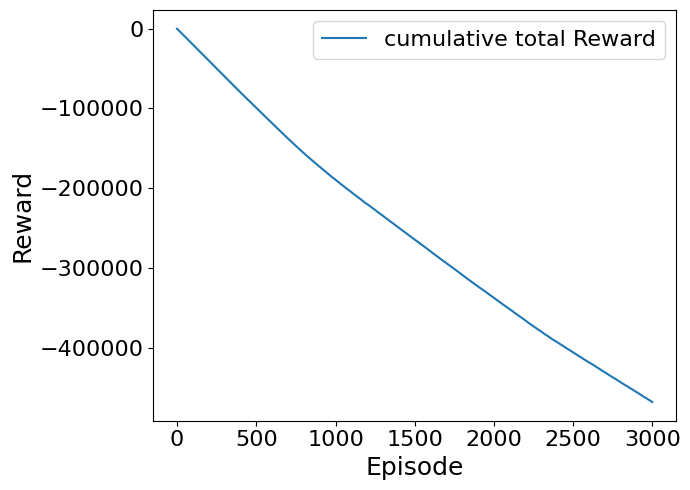

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(total_reward), label='cumulative total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
print(os.curdir)
filename = "./dyna_models/discr_step=[0.1, 0.01]@discount_factor=0.99@20240601-110835/Q.npy"
# filename = "./dyna_models/discr_step=[0.025, 0.005]@discount_factor=0.99@20240531-225627/Q.npy"
Q = np.load(filename)
Q.shape

.


(252, 3)

[-1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.11022302e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01]
[-0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04
  0.05  0.06]


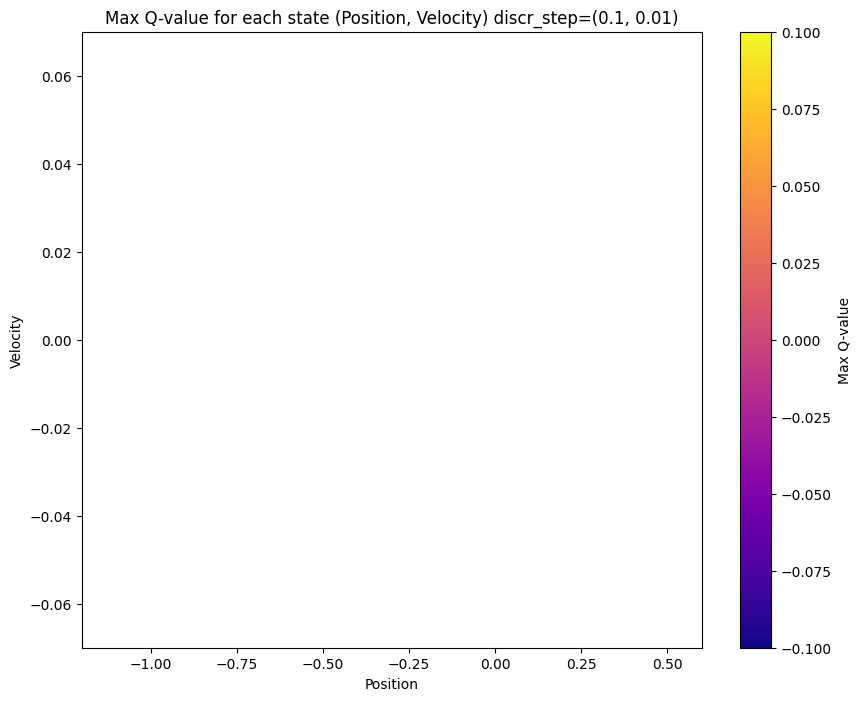

In [4]:
discr_step = (0.1, 0.01)
position_bins = np.arange(-1.2, 0.6, discr_step[0])
velocity_bins = np.arange(-0.07, 0.0699, discr_step[1])
print(position_bins)
print(velocity_bins)

num_pos_bins = len(position_bins)
num_vel_bins = len(velocity_bins)

Q = testDyna.Q

max_Q_values = np.max(Q, axis=1).reshape(num_pos_bins, num_vel_bins)

# Identify unvisited states (where all Q-values are zero)
unvisited_mask = np.all(Q == 0, axis=1).reshape(num_pos_bins, num_vel_bins)

# Mask the max Q-values of unvisited states
masked_max_Q_values = np.ma.masked_where(unvisited_mask, max_Q_values)

# Create a meshgrid for the position and velocity bins
pos_grid, vel_grid = np.meshgrid(position_bins, velocity_bins, indexing='ij')

# # Plot the max Q-values
# plt.figure(figsize=(12, 6))
# contour = plt.contourf(pos_grid, vel_grid, masked_max_Q_values, cmap='plasma')  # Transpose to match the meshgrid orientation
# plt.colorbar(contour, label='Max Q-value')
# plt.xlabel('Position')
# plt.ylabel('Velocity')
# plt.title('Max Q-value for each state (Position, Velocity)')
# plt.show()

# Plot the max Q-values as a heatmap
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(masked_max_Q_values.T, cmap='plasma', origin='lower', aspect='auto',
                     extent=[position_bins[0], position_bins[-1] + discr_step[0], velocity_bins[0], velocity_bins[-1] + discr_step[1]])
plt.colorbar(heatmap, label='Max Q-value')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title(f'Max Q-value for each state (Position, Velocity) discr_step={discr_step}')
plt.savefig(f'Dyna_Q_values_discr_step={discr_step}.png') 
plt.show()